# Run the whole deltas algorithm

In [461]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas
import models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [462]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-5, -5],
    m2=[10, 10],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 50]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

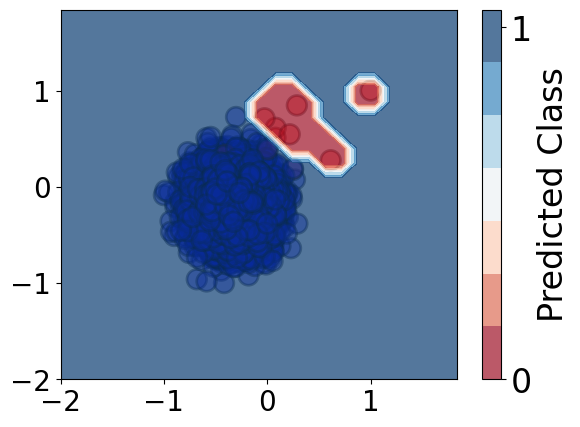

In [463]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [464]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[1.00155137]])

## Fit deltas

deltas init: [1, 0.033556153676086775]
eq. 7 can be satisfied: False
constraint init: False


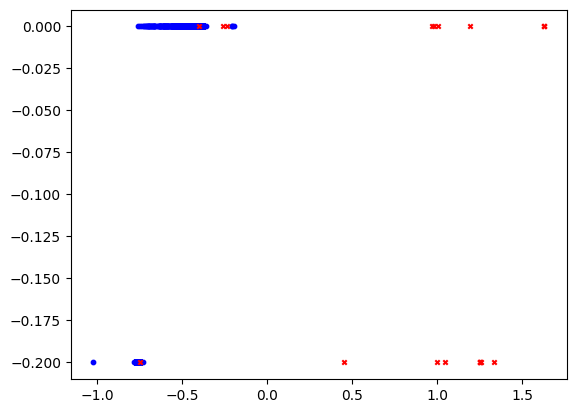

In [465]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.reprojection_deltas(
    clf,
    projection_model=model_deltas.reprojectioner(projecter=models.SVM(kernel='rbf'))
    ).fit(X, y, _print=True, _plot=True)

## Plot training data information

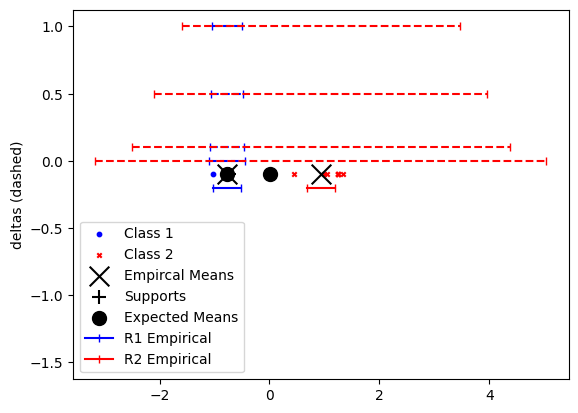

In [466]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [467]:
deltas_model.print_params()

Parameters
                R:  1.3358730354768564
                N1: 10000
                N2: 10
                R1: 0.2515892714299731
                R2: 1.684961864893122
                M:  0.018003506232084687
                D:  1.70744543785865
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.67155
deltas   accuracy: 0.5

original F1: 0.5109076018166928
deltas   F1: 0.6666666666666666

original precision0: 0.603536725209729
deltas   precision0: 0.0

original precision1: 1.0
deltas   precision1: 0.5



/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


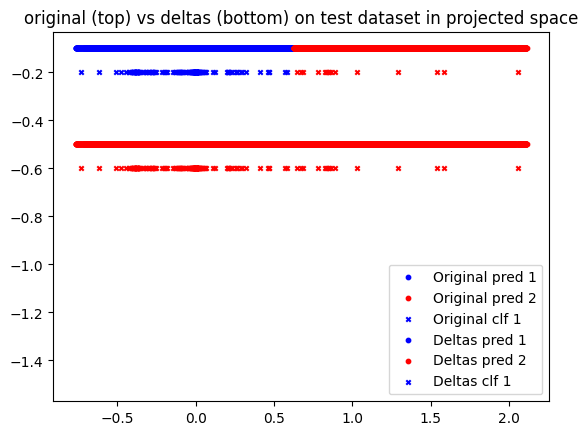

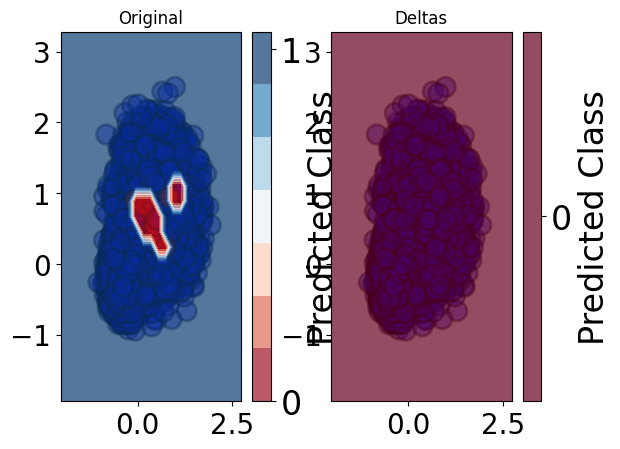

In [468]:
pipeline.eval_test_new(clf, deltas_model,
                       data_clf['data_test'], _print=True, _plot=True)